In [ ]:
!pip install scikeras

In [ ]:
# Split the data
import numpy as np
import cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multiclass import  OneVsOneClassifier,OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Load processed feature matrix and labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from skimage.filters import sobel
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier


In [ ]:
# TODO: Load data and splits if necessary
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Create your first fully connected neural network with the following caracteristics:
# * 1 input layer
# * 1 hidden layer using 32 neurons
# * Input and hidden layers shall have relu activation functions
# * Output layer is activated with softmax
# * As input, we consider the pixels directly -- we'll look later into using engineered features
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


# TODO: Compile the model (setting parameters on how the model will learn from the data)
# Use adam optimizer, sparse categorical cross entropy as loss, and at least the accuracy as the metric
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# TODO: Train the model and store training and validation history
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# TODO: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1887 - loss: 5.9855 - val_accuracy: 0.3917 - val_loss: 1.8557
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5234 - loss: 1.5490 - val_accuracy: 0.6944 - val_loss: 0.9425
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7314 - loss: 0.8565 - val_accuracy: 0.8000 - val_loss: 0.6480
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8121 - loss: 0.5849 - val_accuracy: 0.8694 - val_loss: 0.4624
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8754 - loss: 0.4206 - val_accuracy: 0.8750 - val_loss: 0.4054
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8926 - loss: 0.3217 - val_accuracy: 0.9028 - val_loss: 0.3302
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9218 - loss: 0.2540 - val_accuracy: 0.9000 - val_loss: 0.3357
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9446 - loss: 0.1980 - val_accuracy: 0.9250 - val_loss: 0.277

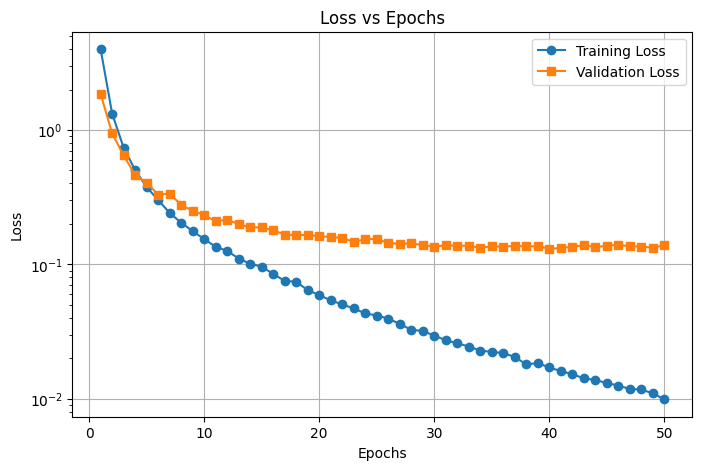

In [ ]:
# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.yscale("log")  # Apply log scale to the y-axis
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid()
plt.show()

# Save the trained model
model.save("digit_classifier_model.keras")  # Native Keras format

In [ ]:
# TODO:
#find a way to combine preprocessing + learning algorithm to achieve the best possible scores.
#Your final tuned model should be written in the test script provided for us to test during the oral exam.